 Business Questions </h1>

<ol>
    <li>How frequently are shark attacks fatal?</li>
    <li>Is there a country where fatal shark attacks are more frequent?</li>
</ol>

# Shark Attacks

In [105]:
import numpy as np
import pandas as pd
import re
import seaborn as sns

In [106]:
pd.options.display.max_columns=99

In [107]:
# Importing the dataset
df = pd.read_csv("attacks.csv", encoding="latin-1")

In [108]:
df.shape

(25723, 24)

In [109]:
pd.options.display.max_columns=99

In [110]:
# Analysing the top rows of the dataset
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [111]:
# Analysing the bottom rows of the dataset
df.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
# Analysing the sample of the dataset
df.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
17251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4398,1952.08.03,03-Aug-1952,1952.0,Unprovoked,USA,Hawaii,"Between Ala Moana Channel & Kewalo Basin, O'ahu",Swimming,Shigeichi Kawamura,M,NaN,"FATAL, disappeared while swimming, shark bite ...",Y,NaN,NaN,"Honolulu Advertiser, 12/4/1952; G.H. Balazs & ...",1952.08.03-Kawamura.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.08.03,1952.08.03,1905.0,NaN,NaN
13749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6755,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

<AxesSubplot:>

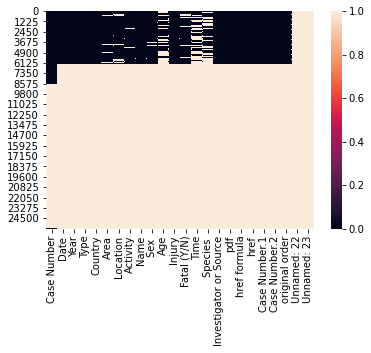

In [114]:
sns.heatmap(df.isnull())

In [115]:
df_bkp = df.copy()

## Cleanining rows

In [116]:
# renaming columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')

In [117]:
df  = df.rename(columns={'fatal_(y/n)':'fatal'})

In [118]:
# discovering the quantity of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex                     5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal                   5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null 

In [119]:
# dropping null colunms
df = df.drop(columns=["unnamed:_22","unnamed:_23"])

In [120]:
# dropping duplicated rows
df.duplicated()
df = df.drop_duplicates()

In [121]:
# discovering new dataframe shape
df.shape

(6312, 22)

In [122]:
# 
df.isna().mean(axis=1).sort_values(ascending=False)

8702     1.000000
25722    0.954545
6309     0.954545
6308     0.909091
6307     0.909091
6306     0.909091
6305     0.909091
6304     0.909091
6303     0.909091
6302     0.909091
4976     0.363636
6165     0.363636
6130     0.363636
6122     0.363636
6108     0.363636
6080     0.363636
5036     0.363636
4018     0.318182
5965     0.318182
1848     0.318182
6158     0.318182
6133     0.318182
1569     0.318182
6125     0.318182
3033     0.318182
           ...   
1387     0.000000
1358     0.000000
1359     0.000000
1362     0.000000
1363     0.000000
3068     0.000000
3065     0.000000
3061     0.000000
1369     0.000000
3055     0.000000
3054     0.000000
3050     0.000000
3048     0.000000
1375     0.000000
1376     0.000000
1377     0.000000
1378     0.000000
1379     0.000000
3046     0.000000
1382     0.000000
1383     0.000000
3042     0.000000
3039     0.000000
1386     0.000000
0        0.000000
Length: 6312, dtype: float64

In [123]:
lines_to_drop = df.loc[(df.isnull().mean(axis=1) > 0.9)].index

In [124]:
df.drop(labels=lines_to_drop, axis=0, inplace=True)

In [125]:
df.shape

(6302, 22)

In [126]:
df.sample(5)

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
1690,2004.03.22,22-Mar-2004,2004.0,Unprovoked,NEW ZEALAND,North Island,Te Arai Point,Spearfishing,Marc Fraser & Blair Fraser,M,NaN,No injury,N,12h30,Bronze whaler shark,J. Edgar,2004.03.22-Fraser.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.03.22,2004.03.22,4613.0
3785,1962.10.25,25-Oct-1962,1962.0,Unprovoked,MEXICO,Veracruz,"Villa del Mar Beach, Veracruz",Wading,"Nicolas Jimenez Nunez, a Catholic priest",M,32,"FATAL, both legs bitten",Y,08h30,2.7 m [9'] shark,C.G. Robles,1962.10.25-Nunez.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1962.10.25,1962.10.25,2518.0
5635,1895.07.16.R,Reported 16-Jul-1895,1895.0,Unprovoked,JAPAN,NaN,NaN,Hunting seals,William Lloyd,M,NaN,FATAL,Y,NaN,NaN,"Morning News, 7/16/1895",1895.07.16.R-Lloyd.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1895.07.16.R,1895.07.16.R,668.0
3106,1979.02.21,21-Feb-1979,1979.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Port Alfred,"Surfing, collided with shark",Charles Kantor,M,19,Punctures on left thigh,N,13h15,1.5 m to 2 m [5' to 6.75'] shark,"C. Kantor, Dr. Macrae, M. Levine, GSAF; G. Ch...",1979.02.21-Kantor.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1979.02.21,1979.02.21,3197.0
6275,ND.0027,No date,0.0,Unprovoked,GREECE,Dodecanese Islands,Symi Island,Sponge diving,Psarofa-gomenes,M,NaN,Head bitten,N,NaN,NaN,M. N. Kalafatas,ND-0027-Psarofagomenos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0027,ND.0027,28.0


In [127]:
# there are differences in 24 rows - exist differences in days, months and years so I will not drop it.
df.loc[df['case_number']!=df['case_number.1']]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
34,2018.04.03,03-Apr-2018,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Surfing,Ross Spowart,M,19,Lacerations to left knee & lower leg,N,15h00,White shark,"K. McMurray, TrackingSharks.com",2018.04.03-StFrancisBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.02,2018.04.03,6269.0
117,2017.07.20.a,20-Jul-2017,2017.0,Unprovoked,USA,California,"Seal Rock, Goleta Beach, Santa Barbara",SUP,Rolf Geyling,M,50,"No injury, shark bit paddleboard",N,07h45,"White shark, 8' to 10'","R. Collier, GSAF",2017.07.20.a-Geyling.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017/07.20.a,2017.07.20.a,6186.0
144,2017.05.06,05-May-2017,2017.0,Unprovoked,MEXICO,Baja California Sur,"Los Arbolitos, Cabo Pulmo",Snorkeling,Andres Rozada,M,33,FATAL,Y,17h00,NaN,J. Rozada,2017.05.06-Rozada.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.06,2017.05.06,6159.0
217,2016.09.15,16-Sep-2016,2016.0,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,6086.0
314,2016.01.24.b,24-Jan-2016,2016.0,Unprovoked,USA,Texas,Off Surfside,Spearfishing,Keith Love,M,NaN,"Bruised ribs & tail bone, speargun broken and ...",N,09h30 / 10h00,Bull sharks x 2,K. Love,2016.01.24.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.01.24.b,2016.01.24.b,5989.0
334,2015.12.23,07-Nov-2015,2015.0,Invalid,USA,Florida,"Paradise Beach, Melbourne, Brevard County",Surfing,Ryla Underwood,F,9,Lower left leg injured,NaN,11h00,Shark involvement not confirmed,"Fox25Orlando, 11/7/2015",2015.11.07-Underwood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.11.07,2015.12.23,5969.0
339,2015.10.28.a,28-Oct-2015,2015.0,Unprovoked,USA,Hawaii,"Malaka, Oahu",Body boarding,Raymond Senensi,M,10,"Lacerations & puncture wounds to right thigh, ...",N,14h50,NaN,"Star Advertiser, 10/28/2015",2015.10.28-Senensi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.10.28,2015.10.28.a,5964.0
390,2015.07-10,10-Jul-2015,2015.0,Unprovoked,USA,California,"Huntington Beach, Orange County",Surfing,Danny Miskin,M,38,"No injury, shark bumped & damaged board",N,08h45,"White shark, 7'","KTLA, 7/10/2015",2015.07.10-Miskin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.10,2015.07.10,5913.0
560,2014.05.04,04-May-2014,2014.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Simonstown,Diving,NaN,NaN,NaN,4-inch laceration to arm,N,NaN,Cow shark,"Sunday Times, 5/5/2014",2015.05.04-CowShark.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.05.04,2014.05.04,5743.0
3522,1967.07.05,05-Jul-1967,1967.0,Unprovoked,TURKEY,Mugla Province,Kucukada Island,Spearfishing,Gungor Guven,M,36,FATAL,Y,13h40,NaN,"C. Moore, GSAF",1967.07.05-Guven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1967/07.05,1967.07.05,2781.0


In [128]:
# unlike format - dropping columns "case_number.2"
df.loc[df['case_number']!=df['case_number.2']]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
390,2015.07-10,10-Jul-2015,2015.0,Unprovoked,USA,California,"Huntington Beach, Orange County",Surfing,Danny Miskin,M,38,"No injury, shark bumped & damaged board",N,08h45,"White shark, 7'","KTLA, 7/10/2015",2015.07.10-Miskin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.10,2015.07.10,5913.0
4949,1934.01.08.R,Reported 08-Feb-1934,1934.0,Boating,TURKEY,Istanbul,"Haydarpasa jetty, Istanbul",Fishing,2 males,M,NaN,No injury,N,NaN,NaN,"C. Moore, GSAF",1924.02.08.R-Turkey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1934.02.08.R,1934.02.08.R,1354.0
5488,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,NaN,Lacerations to leg from hooked shark PROVOKED ...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815.0
5944,1864.05,May-1864,1864.0,Unprovoked,MAURITIUS,300 miles east of Mauritius,NaN,Fell overboard,male from the whaler Albatross,M,NaN,FATAL,Y,NaN,NaN,"North Adams Transcript, 3/18/1898",1864.05.00.Mauritius.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1864.05.00,1864.05.00,359.0


In [129]:
df.drop(columns=['case_number.2'], inplace=True)

In [130]:
df.head(5)

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,original_order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,6299.0


In [131]:
# analysing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             6301 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex                     5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal                   5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null   

# Checking the "fatal" column

In [132]:
df['fatal'].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
N             1
y             1
2017          1
Name: fatal, dtype: int64

In [133]:
def change_no(row):
    return re.sub(' *N *','N', str(row))

In [134]:
df['fatal'] = df['fatal'].map(change_no)

In [135]:
df['fatal'].value_counts()

N          4301
Y          1388
nan         539
UNKNOWN      71
M             1
y             1
2017          1
Name: fatal, dtype: int64

In [136]:
def change_yes(row):
    return re.sub('y','Y', str(row))

In [137]:
 df['fatal']= df['fatal'].map(change_yes)

In [138]:
# converting nan to unknown
def change_nan(row):
    return re.sub('nan','UNKNOWN',str(row))

In [139]:
df['fatal'] = df['fatal'].map(change_nan)

In [140]:
df['fatal'].value_counts()

N          4301
Y          1389
UNKNOWN     610
M             1
2017          1
Name: fatal, dtype: int64

In [141]:
# converting 2017 to unknown
def change_2017(row):
    return re.sub('2017','UNKNOWN',str(row))

In [142]:
df['fatal']= df['fatal'].map(change_2017)

In [143]:
# converting M to UNKNOWN
def change_m(row):
    return re.sub('M','UNKNOWN',str(row))

In [144]:
df['fatal']= df['fatal'].map(change_m)

In [145]:
df['fatal'].value_counts()

N          4301
Y          1389
UNKNOWN     612
Name: fatal, dtype: int64

In [146]:
df.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,original_order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,6299.0


In [147]:
# there are rows where injury is 'FATAL' and fatal is 'UNKNOWN'
df.loc[df['injury'] == 'FATAL']

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,original_order
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,6297.0
58,2017.11.30.a,30-Nov-2017,2017.0,Unprovoked,COSTA RICA,Cocos Island,Manuelita,Scuba diving,Rohina Bhandari,F,49,FATAL,Y,NaN,"Tiger shark, female",R. Arauz,2017.11.30.a-Bhandari.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.30.a,6245.0
59,2017.11.25.R,Reported 25-Nov-2017,2017.0,Sea Disaster,LIBYA,NaN,Gars Garabulli,2 boats capsized,31 migrants,NaN,NaN,FATAL,Y,NaN,Some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",2017.11.25.R-Libya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.25.R,6244.0
64,2017.11.04,04-Nov-2017,2017.0,Unprovoked,CUBA,Holquin Province,Guardalavaca Beach,Night bathing,Jesús Cabrera González,M,22,FATAL,Y,23h30,Tiger shark,TrackingSharks.com,2017.11.04-Cuba.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.04,6239.0
76,2017.10.01,01-Oct-2017,2017.0,Invalid,SOUTH AFRICA,Western Cape Province,Dyer Island,Scuba Diving,Bradley Fick,M,31,FATAL,UNKNOWN,NaN,Death may have been due to drowning,"All Africa, 10/11/2017",2017.10.01-Fick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.01,6227.0
91,2017.09.03.b,03-Sep-2017,2017.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Dyer Island,"Swimming, poaching abalone",Sivuyile Xelela,M,NaN,FATAL,Y,Morning,NaN,"All Africa, 10/11/2017",2017.09.03.b-Xelela.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.03.b,6212.0
144,2017.05.06,05-May-2017,2017.0,Unprovoked,MEXICO,Baja California Sur,"Los Arbolitos, Cabo Pulmo",Snorkeling,Andres Rozada,M,33,FATAL,Y,17h00,NaN,J. Rozada,2017.05.06-Rozada.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.06,6159.0
149,2017.04.29.a,29-Apr-2017,2017.0,Unprovoked,REUNION,Saint-Leu,Pointe au Sal,Body boarding,Adrien Dubosc,M,28,FATAL,Y,11h15,NaN,"Clicanoo, 4/29/2017",2017.04.29.a-Dubosc.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.29.a,6154.0
155,2017.04.17.a,17-Apr-2017,2017.0,Unprovoked,AUSTRALIA,Western Australia,Kelpies near Wylie Bay,Surfing,Laeticia Brouwer,F,17,FATAL,Y,16h00,White shark,"B. Myatt, GSAF",2017.04.17.a Brouwer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.17.a,6148.0
221,2016.09.06,06-Sep-2016,2016.0,Unprovoked,NEW CALEDONIA,North Province,Koumac,Kite surfing,David Jewell,M,50,FATAL,Y,15h40,NaN,"TVANouvelles, 9/6/2016",2016.09.06-Jewell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.06,6082.0


In [148]:
condition1 = df['injury']== 'FATAL'
condition2 = df['fatal']== 'UNKNOWN'
df[condition1 & condition2]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,original_order
76,2017.10.01,01-Oct-2017,2017.0,Invalid,SOUTH AFRICA,Western Cape Province,Dyer Island,Scuba Diving,Bradley Fick,M,31,FATAL,UNKNOWN,NaN,Death may have been due to drowning,"All Africa, 10/11/2017",2017.10.01-Fick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.01,6227.0
874,2011.08.28.b,28-Aug-2011,2011.0,Invalid,AUSTRALIA,Queensland,Fantome Island,Swimming,Rooster,M,48,FATAL,UNKNOWN,19h30,Shark involvement prior to death not confirmed,"Courier Pigeon, 8/30/2011",2011.08.28-Roosteer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2011.08.28.b,5429.0
2230,1997.08.14.b,14-Aug-1997,1997.0,Invalid,MEXICO,Quintana Roo,"Santa Rosa, Cozumel",SCUBA diving,Mike Jonatis,M,28,FATAL,UNKNOWN,NaN,Shark involvement prior to death was not confi...,"Charlotte Observer, 8/22/2997, p.7C & 8C; York...",1997.08.14.b-Joniatis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1997.08.14.b,4073.0
2660,1989.10.08,08-Oct-1989,1989.0,Invalid,USA,North Carolina,"Between Wrightsville Beach & Carolina Beach, N...",Diving,Doug Nunnally,M,49,FATAL,UNKNOWN,Late afternoon,Shark involvement suspected but not confirmed,"C. Creswell, GSAF & Search & Rescue diver, New...",1989.10.08-Nunnally.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1989.10.08,3643.0
2674,1989.07.27,27-Jul-1989,1969.0,Invalid,BERMUDA,NaN,NaN,Scuba diving,Russian male,M,35,FATAL,UNKNOWN,NaN,Shark involvement suspected but not confirmed,"LA Times, 7/28/1989",1989.07.27-SovietDiver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1989.07.27,3629.0
2791,1987.00.00.b,1987,1987.0,Invalid,MONTENEGRO,Adriatic Sea,"Mogren Beach, Budva",Jumped into the water from a cliff,a student from Belgrade,M,NaN,FATAL,UNKNOWN,NaN,Doubtful / Unconfirmed attack / Unable to veri...,D. Ljusic,1987.00.00.b-Budva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1987.00.00.b,3512.0
2953,1983.01.15,15-Jan-1983,1983.0,Invalid,SOUTH AFRICA,KwaZulu-Natal,Amanzimtoti,NaN,black male,M,NaN,FATAL,UNKNOWN,NaN,Shark involvement prior to death was not confi...,"G. Cliff & B. Davis, NSB",1983.01.15-Amanzimtoti.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.01.15,3350.0
3811,1962.06.25,25-Jun-1962,1962.0,Invalid,USA,Florida,"Fernandina Beach, Nassau County",U.S. Airforce crewman reported missing after b...,male,M,NaN,FATAL,UNKNOWN,NaN,Shark involvement not confirmed,SAF Case #1106,1962.06.25-NV-AirForce-bailout.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1962.06.25,2492.0
4780,1940.00.00.b,1940,1940.0,Invalid,SOUTH AFRICA,KwaZulu-Natal,Winkelspruit,NaN,Indian female,F,NaN,FATAL,UNKNOWN,NaN,Questionable incident,"V.M. Coppleson (1958), p.247; SAF Case #161. U...",1940.00.00.b-IndianFemale.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.b,1523.0
5196,1923.11.02,02-Nov-1923,1923.0,Invalid,AUSTRALIA,New South Wales,Bellinger Head,Fishing,male,M,NaN,FATAL,UNKNOWN,NaN,Shark involvement suspected but not confirmed,"V.M. Coppleson, p.452; G.P. Whitley",1923.11.02-BellingerHead.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1923.11.02,1107.0


In [149]:
def fatal_fake_unknown(df):
    if df['fatal']=='UNKNOWN':
        if df['injury']=='FATAL':
            return re.sub('UNKNOWN', 'Y', df['fatal'])
        else:
            return re.sub('UNKNOWN', 'UNKNOWN', df['fatal'])
    if df['fatal']=='Y':
        return re.sub('Y', 'Y', df['fatal'])
    if df['fatal']=='N':
        return re.sub('N', 'N', df['fatal'])
    

In [150]:
df['fatal'] = df.apply(fatal_fake_unknown, axis=1)

In [151]:
df['fatal'].value_counts()

N          4301
Y          1409
UNKNOWN     592
Name: fatal, dtype: int64

<AxesSubplot:>

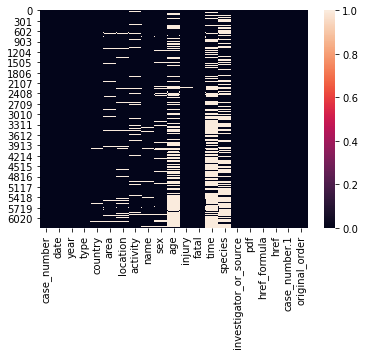

In [152]:
sns.heatmap(df.isnull())

In [153]:
# Exporting only the fatal accidents to csv:

fatal_clean = df[df['fatal'] == 'Y']
fatal_clean.to_csv("./ExportedFiles/FatalAccidents.csv", index=False)

In [154]:
# Exporting only the non fatal accidents to csv:

nonfatal_clean = df[df['fatal'] == 'N']
nonfatal_clean.to_csv("./ExportedFiles/NonFatalAccidents.csv", index=False)

In [155]:
# Exporting only the accidents with unknown damages to csv:

unknown_clean = df[df['fatal'] == 'UNKNOWN']
unknown_clean.to_csv("./ExportedFiles/UnknownAccidents.csv", index=False)

# Presenting Results

# Existe algum país onde os ataques fatais são mais frequentes?

In [156]:
df['fatal'].value_counts()

N          4301
Y          1409
UNKNOWN     592
Name: fatal, dtype: int64

In [157]:
fatal_y= (df['fatal']=='Y').sum()
fatal_n= (df['fatal']=='N').sum()
fatal_un=(df['fatal']=='UNKNOWN').sum()
print('% Fatal: =',(df['fatal']=='Y').mean().round(4)*100,'%') 
print('% Non-Fatal =',(df['fatal']=='N').mean().round(4)*100,'%')
print('% Unknown =',(df['fatal']=='UNKNOWN').mean().round(4)*100,'%')

% Fatal: = 22.36 %
% Non-Fatal = 68.25 %
% Unknown = 9.39 %


In [159]:
df[df['fatal'] == 'Y'].groupby(['country', 'fatal'])['fatal'].count().sort_values(ascending=False)

country           fatal
AUSTRALIA         Y        287
USA               Y        189
SOUTH AFRICA      Y        109
PAPUA NEW GUINEA  Y         56
MEXICO            Y         44
                          ... 
DIEGO GARCIA      Y          1
Coast of AFRICA   Y          1
KOREA             Y          1
SAN DOMINGO       Y          1
 PHILIPPINES      Y          1
Name: fatal, Length: 148, dtype: int64

In [160]:
df[df['fatal'] == 'N'].groupby(['country', 'fatal'])['fatal'].count().sort_values(ascending=False)

country                fatal
USA                    N        1837
AUSTRALIA              N         921
SOUTH AFRICA           N         407
BAHAMAS                N          94
NEW ZEALAND            N          91
                                ... 
NICARAGUA              N           1
NICARAGUA              N           1
NIGERIA                N           1
NORTH ATLANTIC OCEAN   N           1
 TONGA                 N           1
Name: fatal, Length: 153, dtype: int64

In [161]:
df[df['fatal'] == 'UNKNOWN'].groupby(['country', 'fatal'])['fatal'].count().sort_values(ascending=False)

country          fatal  
USA              UNKNOWN    203
AUSTRALIA        UNKNOWN    130
SOUTH AFRICA     UNKNOWN     63
ITALY            UNKNOWN     17
NEW ZEALAND      UNKNOWN     12
                           ... 
HAITI            UNKNOWN      1
GUATEMALA        UNKNOWN      1
GUAM             UNKNOWN      1
SOLOMON ISLANDS  UNKNOWN      1
YEMEN            UNKNOWN      1
Name: fatal, Length: 79, dtype: int64

In [162]:
df['is_fatal'] = pd.get_dummies(df.fatal)['Y']
df['not_is_fatal'] = pd.get_dummies(df.fatal)['N']
df['total'] = df['is_fatal'] + df['not_is_fatal']

In [163]:
df

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,original_order,is_fatal,not_is_fatal,total
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,6303.0,0,1,1
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,6302.0,0,1,1
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,6301.0,0,1,1
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,6300.0,0,1,1
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,6299.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,6.0,1,0,1
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,5.0,1,0,1
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,4.0,1,0,1
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,3.0,1,0,1


In [164]:
pd.set_option("max_rows", 100)


df.groupby('country')\
.agg(fatal_attack = ('is_fatal','sum'),non_fatal_attack=('not_is_fatal','sum'))\
.sort_values(by='fatal_attack',ascending=False)

,fatal_attack,non_fatal_attack
country,,
AUSTRALIA,287.0,921.0
USA,189.0,1837.0
SOUTH AFRICA,109.0,407.0
PAPUA NEW GUINEA,56.0,74.0
MEXICO,44.0,35.0
BRAZIL,38.0,64.0
PHILIPPINES,36.0,21.0
REUNION,29.0,31.0
NEW ZEALAND,25.0,91.0


In [165]:
filter = df['is_fatal'] == 1

In [166]:
qt_fatal_country = df.loc[filter]['country'].value_counts()

In [167]:
qt_fatal_country = pd.DataFrame(qt_fatal_country)

In [168]:
qt_fatal_country = qt_fatal_country.rename(columns={'country':'fatalities'})

In [169]:
cases_per_country = df['country'].value_counts()

In [170]:
cases_per_country = pd.DataFrame(cases_per_country)

In [171]:
cases_per_country = cases_per_country.rename(columns={'country':'total_of_attacks'})

In [172]:
share_df = pd.concat([cases_per_country,qt_fatal_country],axis='columns')

In [174]:
share_df['fatalities'] = share_df['fatalities'].fillna(0)

In [175]:
share_df['fatalities'] = share_df['fatalities'].astype(int)

In [176]:
share_df

,total_of_attacks,fatalities
USA,2229,189
AUSTRALIA,1338,287
SOUTH AFRICA,579,109
PAPUA NEW GUINEA,134,56
NEW ZEALAND,128,25
BRAZIL,112,38
BAHAMAS,109,10
MEXICO,89,44
ITALY,71,14
FIJI,62,22


In [177]:
share_df['pct_fatalities'] = share_df['fatalities']/share_df['total_of_attacks']*100

In [180]:
share_df.sort_values(by='total_of_attacks', ascending=False)

,total_of_attacks,fatalities,pct_fatalities
USA,2229,189,8.479139
AUSTRALIA,1338,287,21.449925
SOUTH AFRICA,579,109,18.825561
PAPUA NEW GUINEA,134,56,41.791045
NEW ZEALAND,128,25,19.531250
BRAZIL,112,38,33.928571
BAHAMAS,109,10,9.174312
MEXICO,89,44,49.438202
ITALY,71,14,19.718310
FIJI,62,22,35.483871


In [200]:
larger_than_30_pct = share_df[share_df['pct_fatalities'] > 30 ]

In [201]:
larger_than_30_pct

,total_of_attacks,fatalities,pct_fatalities
PAPUA NEW GUINEA,134,56,41.791045
BRAZIL,112,38,33.928571
MEXICO,89,44,49.438202
FIJI,62,22,35.483871
PHILIPPINES,61,36,59.016393
REUNION,60,29,48.333333
NEW CALEDONIA,53,18,33.962264
CUBA,46,24,52.173913
MOZAMBIQUE,45,19,42.222222
INDIA,40,21,52.500000


In [183]:
df_fatal = df[df['fatal'] == 'Y']

In [184]:
df_fatal['type'].value_counts()

Unprovoked      1182
Sea Disaster     168
Invalid           27
Provoked          19
Boating            7
Boat               4
Name: type, dtype: int64

In [186]:
df_fatal['activity'].value_counts()

Swimming                                                                                                                                         306
Bathing                                                                                                                                           75
Surfing                                                                                                                                           49
Fishing                                                                                                                                           48
Spearfishing                                                                                                                                      41
Fell overboard                                                                                                                                    27
Swimming                                                                                                  

In [191]:
pd.set_option("max_colwidth", None)
df_fatal[df_fatal['activity']=='Murder']

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,original_order,is_fatal,not_is_fatal,total
1394,2007.03.22,22-Mar-2007,2007.0,Unprovoked,YEMEN,Muhafazat Hadramawt,Ras-Alkalb,Murder,At least 29 (and possibly another 71) Somali & Ethiopian refugees,NaN,NaN,"FATAL, beaten & thrown overboard by smugglers, they were killed by sharks",Y,Morning,NaN,"United Nations High Commission for Refugees, 3/26/2007",2007.03.22-EthiopianRefugees.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2007.03.22-EthiopianRefugees.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2007.03.22-EthiopianRefugees.pdf,2007.03.22,4909.0,1,0,1
1426,2006.10.00.a,Oct-2006,2006.0,Unprovoked,GULF OF ADEN,Between Somalia & Yemen,NaN,Murder,5 Ethiopian refugees,NaN,NaN,"FATAL, beaten & thrown overboard by smugglers, they were killed by sharks",Y,NaN,NaN,"United Nations High Commission for Refugees, 10/20/2006",2006.10.00.a-EthiopianRefugees.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2006.10.00.a-EthiopianRefugees.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2006.10.00.a-EthiopianRefugees.pdf,2006.10.00.a,4877.0,1,0,1
5662,1893.10.20.R,Reported 20-Oct-1893,1893.0,Unprovoked,INDIA,Bay of Bengal,Madras Harbor,Murder,A young pearl trader,M,NaN,FATAL,Y,NaN,NaN,"Middletown Daily Argus, 10/20/1893",1893.10.20.R-PearlTrader.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1893.10.20.R-PearlTrader.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1893.10.20.R-PearlTrader.pdf,1893.10.20.R,641.0,1,0,1
6144,1776.00.00.R,Reported 1776,1776.0,Unprovoked,GUINEA,NaN,NaN,Murder,African slave,M,NaN,FATAL,Y,NaN,NaN,T. Pennant,1776.00.00.R-Slave.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1776.00.00.R-Slave.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1776.00.00.R-Slave.pdf,1776.00.00.R,159.0,1,0,1
